In [1]:
import os
import shutil
from glob import glob
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops
from tqdm import tqdm

%matplotlib inline

In [2]:
image_paths = glob(
    os.path.join(
        "../data/pulmonary-chest-xray-abnormalities/Montgomery/MontgomerySet/CXR_png",
        "*.png",
    )
)

In [3]:
images_with_masks_paths = [
    (
        image_path,
        os.path.join(
            "/".join(image_path.split("/")[:-2]),
            "ManualMask",
            "leftMask",
            os.path.basename(image_path),
        ),
        os.path.join(
            "/".join(image_path.split("/")[:-2]),
            "ManualMask",
            "rightMask",
            os.path.basename(image_path),
        ),
    )
    for image_path in image_paths
]

In [4]:
in_img = Image.open(images_with_masks_paths[0][0]).convert("RGB")
l = Image.open(images_with_masks_paths[0][1]).convert("L")
r = Image.open(images_with_masks_paths[0][2]).convert("L")

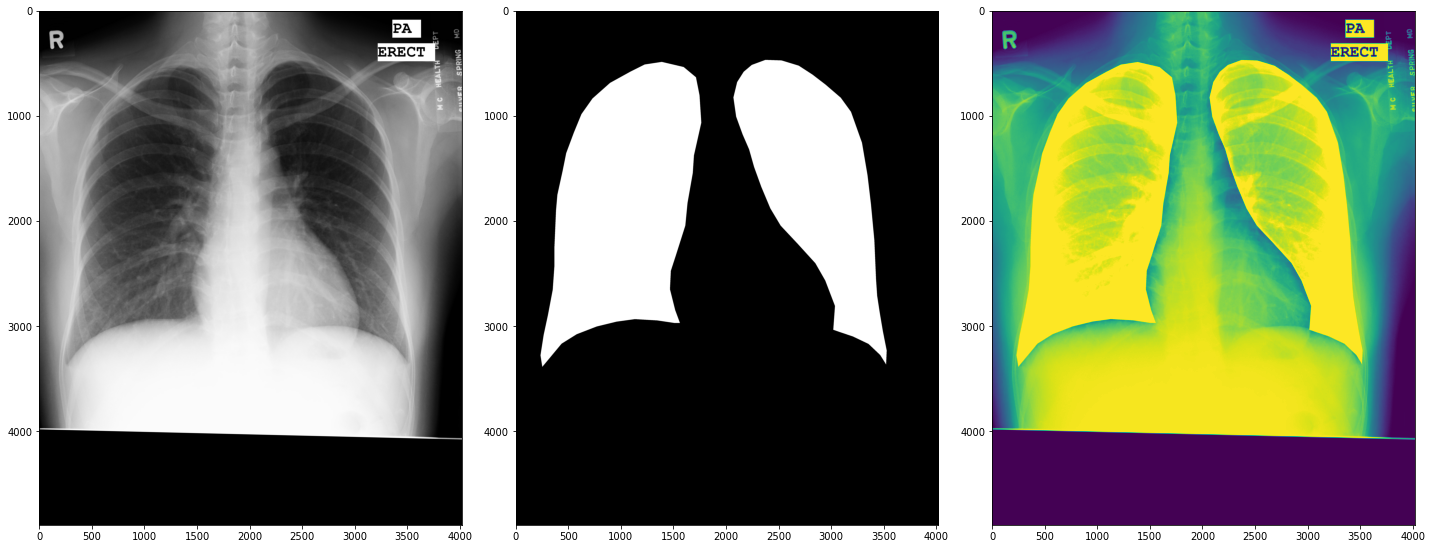

In [5]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
img = in_img
mask = ImageChops.add(l, r)
axis[0].imshow(img)
axis[1].imshow(mask, cmap="gray")
axis[2].imshow(cv2.addWeighted(np.array(img)[..., 2], 1.0, np.array(mask), 0.7, 1))
plt.tight_layout()

In [6]:
mask_path = Path("../data/proc_seg/masks")
mask_path.mkdir(exist_ok=True, parents=True)

cxr_path = Path("../data/proc_seg/cxr_pngs")
cxr_path.mkdir(exist_ok=True, parents=True)

In [7]:
mask_path / Path(images_with_masks_paths[0][0]).name, cxr_path / Path(
    images_with_masks_paths[0][0]
).name

(PosixPath('../data/proc_seg/masks/MCUCXR_0047_0.png'),
 PosixPath('../data/proc_seg/cxr_pngs/MCUCXR_0047_0.png'))

In [9]:
for cxr, left, right in tqdm(images_with_masks_paths):
    left = Image.open(left).convert("L")
    right = Image.open(right).convert("L")
    seg_img = ImageChops.add(left, right)
    filename = Path(cxr).name
    shutil.copy(cxr, cxr_path / filename)
    seg_img.save(mask_path / filename)

100%|██████████| 138/138 [01:17<00:00,  1.79it/s]
